In [8]:
import pandas as pd


# Cargar los archivos
ventas = pd.read_csv('C:/Users/jenif/sucursal-preprocesado/datos_originales/sucursales.csv')
sucursales = pd.read_csv('C:/Users/jenif/sucursal-preprocesado/datos_originales/sucursales.csv')

# Vista previa
print("VENTAS:")
print(ventas.head())

print("\nSUCURSALES:")
print(sucursales.head())


VENTAS:
   id_sucursal nombre_sucursal                  direccion  \
0            1          Avavee  99869 Meadow Ridge Circle   
1            2         Jaxbean       20491 Sauthoff Trail   
2            3       Gigashots           8 Dovetail Court   
3            4         Pixonyx            1 Talisman Pass   
4            5         Yakitri     4254 Crescent Oaks Way   

                ciudad        pais      telefono  codigo_postal  \
0                Nîmes      France  529-725-8784  30942 CEDEX 9   
1              Bungkal   Indonesia  686-904-4283            NaN   
2                Ipirá      Brazil  379-697-7291      44600-000   
3                Genzi       China  797-784-7603            NaN   
4  Boevange-sur-Attert  Luxembourg  321-246-7725         L-8711   

                   email fecha_apertura  
0   acrutcher0@wikia.com     10/14/2024  
1  dmatteucci1@bbc.co.uk      4/22/2025  
2     maubray2@desdev.cn      6/12/2025  
3   cnoury3@mashable.com      1/15/2025  
4  csherwood

In [9]:
# Ver cuántos valores nulos hay por columna
print("NULOS EN VENTAS:\n", ventas.isnull().sum())
print("\nNULOS EN SUCURSALES:\n", sucursales.isnull().sum())

# Verificar duplicados
print("\nDUPLICADOS EN VENTAS:", ventas.duplicated().sum())
print("DUPLICADOS EN SUCURSALES:", sucursales.duplicated().sum())


NULOS EN VENTAS:
 id_sucursal         0
nombre_sucursal     0
direccion           0
ciudad              0
pais                0
telefono            0
codigo_postal      53
email               0
fecha_apertura      0
dtype: int64

NULOS EN SUCURSALES:
 id_sucursal         0
nombre_sucursal     0
direccion           0
ciudad              0
pais                0
telefono            0
codigo_postal      53
email               0
fecha_apertura      0
dtype: int64

DUPLICADOS EN VENTAS: 0
DUPLICADOS EN SUCURSALES: 0


In [9]:
# Eliminar duplicados si hay
ventas.drop_duplicates(inplace=True)
sucursales.drop_duplicates(inplace=True)

# Rellenar valores nulos en código_postal si quieres (o eliminarlos)
ventas['codigo_postal'] = ventas['codigo_postal'].fillna('Desconocido')




In [10]:
ventas['fecha_apertura'] = pd.to_datetime(ventas['fecha_apertura'], errors='coerce')


In [11]:
df_combinado = pd.merge(sucursales, ventas, on='id_sucursal', how='left')
df_combinado.head()


,id_sucursal,nombre_sucursal_x,direccion_x,ciudad_x,pais_x,telefono_x,codigo_postal_x,email_x,fecha_apertura_x,nombre_sucursal_y,direccion_y,ciudad_y,pais_y,telefono_y,codigo_postal_y,email_y,fecha_apertura_y
0,1,Avavee,99869 Meadow Ridge Circle,Nîmes,France,529-725-8784,30942 CEDEX 9,acrutcher0@wikia.com,10/14/2024,Avavee,99869 Meadow Ridge Circle,Nîmes,France,529-725-8784,30942 CEDEX 9,acrutcher0@wikia.com,2024-10-14
1,2,Jaxbean,20491 Sauthoff Trail,Bungkal,Indonesia,686-904-4283,NaN,dmatteucci1@bbc.co.uk,4/22/2025,Jaxbean,20491 Sauthoff Trail,Bungkal,Indonesia,686-904-4283,NaN,dmatteucci1@bbc.co.uk,2025-04-22
2,3,Gigashots,8 Dovetail Court,Ipirá,Brazil,379-697-7291,44600-000,maubray2@desdev.cn,6/12/2025,Gigashots,8 Dovetail Court,Ipirá,Brazil,379-697-7291,44600-000,maubray2@desdev.cn,2025-06-12
3,4,Pixonyx,1 Talisman Pass,Genzi,China,797-784-7603,NaN,cnoury3@mashable.com,1/15/2025,Pixonyx,1 Talisman Pass,Genzi,China,797-784-7603,NaN,cnoury3@mashable.com,2025-01-15
4,5,Yakitri,4254 Crescent Oaks Way,Boevange-sur-Attert,Luxembourg,321-246-7725,L-8711,csherwood4@eepurl.com,7/23/2024,Yakitri,4254 Crescent Oaks Way,Boevange-sur-Attert,Luxembourg,321-246-7725,L-8711,csherwood4@eepurl.com,2024-07-23


In [12]:
df_combinado.to_csv('ventas_preprocesadas.csv', index=False)


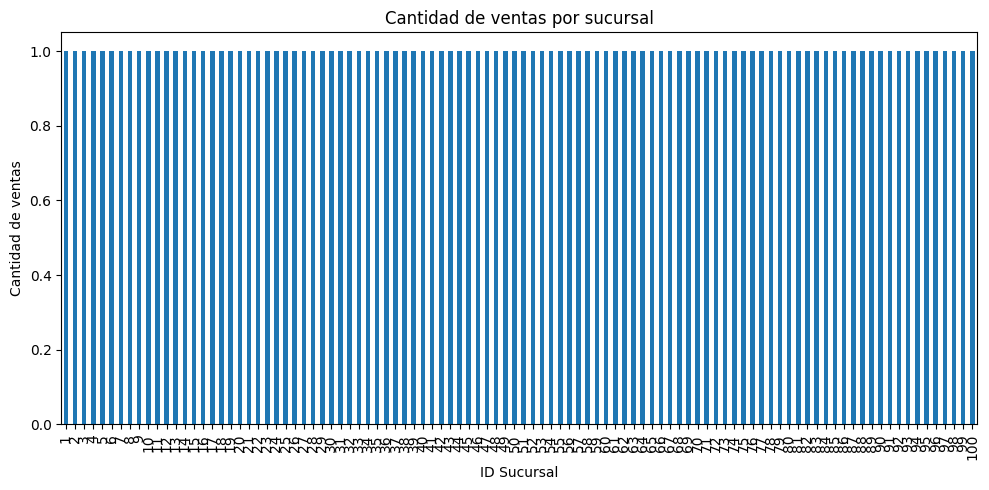

In [14]:
import matplotlib.pyplot as plt

ventas_por_sucursal = ventas['id_sucursal'].value_counts()

ventas_por_sucursal.plot(kind='bar', figsize=(10,5), title='Cantidad de ventas por sucursal')
plt.xlabel('ID Sucursal')
plt.ylabel('Cantidad de ventas')
plt.tight_layout()
plt.show()


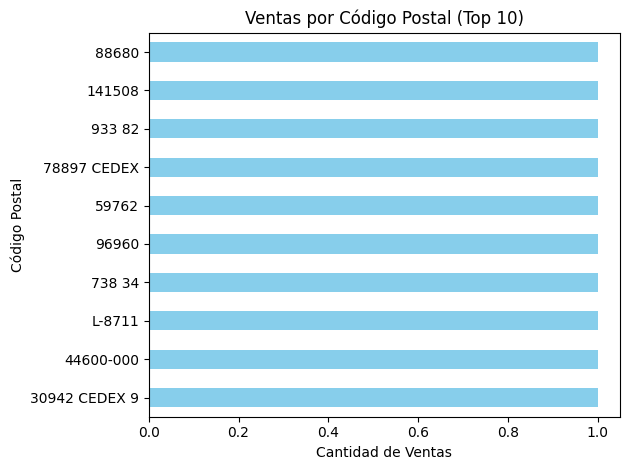

In [15]:
ventas_por_cp = ventas['codigo_postal'].value_counts().head(10)  # Solo los 10 más comunes

ventas_por_cp.plot(kind='barh', title='Ventas por Código Postal (Top 10)', color='skyblue')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Código Postal')
plt.tight_layout()
plt.show()


In [16]:

print(ventas.columns)


Index(['id_sucursal', 'nombre_sucursal', 'direccion', 'ciudad', 'pais',
       'telefono', 'codigo_postal', 'email', 'fecha_apertura'],
      dtype='object')


In [13]:
print(ventas.columns)


Index(['id_sucursal', 'nombre_sucursal', 'direccion', 'ciudad', 'pais',
       'telefono', 'codigo_postal', 'email', 'fecha_apertura'],
      dtype='object')
